# This notebook uses the dataset of Park et al. (2016) to illustrate how to make plots for DGSA sensitivity results.

# Load saved results

In [19]:
import sys
from pathlib import Path

# Add the src directory to the system path
root_path = Path.cwd().parent
sys.path.append(str(root_path / "src"))

from utils.DGSA_save_load import DGSA_load
# Load results
case_name = "Park2016"
DGSA_results= DGSA_load(root_path / 'results' / f'{case_name}_DGSA_results.pkl')

# Visualization: Pareto plots

## Single parameter sensitivity

### Pareto plot for standardized sensitivity using the l1nomr method

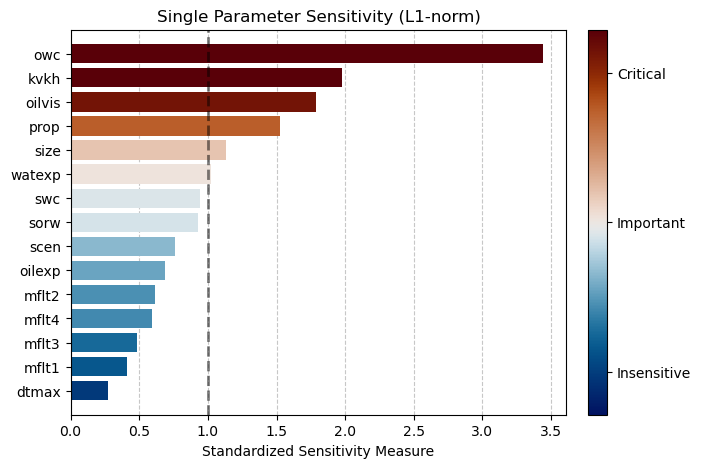

In [20]:
from visualization.single_pareto import single_pareto_standardized

single_pareto_standardized(
    single_sensitivity_results =  DGSA_results['single_l1norm'], # results for single parameter sensitivity
    parameter_names = DGSA_results['parameter_names'], # model parameter names
    title = "Single Parameter Sensitivity (L1-norm)",  # plot title
    fig_size = (7, 5), # figure size
    font_size = 10, # font size
    font = 'DejaVu Sans' # font family
)

### Pareto plot for sensitivity by cluster using the l1nomr method

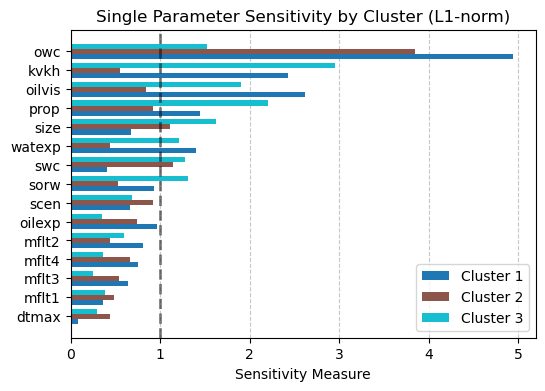

In [21]:
from visualization.single_pareto import single_pareto_by_cluster

single_pareto_by_cluster(
    single_sensitivity_results =  DGSA_results['single_l1norm'], # results for single parameter sensitivity
    parameter_names = DGSA_results['parameter_names'], # model parameter names
    title = "Single Parameter Sensitivity by Cluster (L1-norm)", # plot title
    fig_size = (6, 4), # figure size
    font_size = 10, # font size
    font = 'DejaVu Sans' # font family
)

### Pareto plot for standardized sensitivity using the ASL method

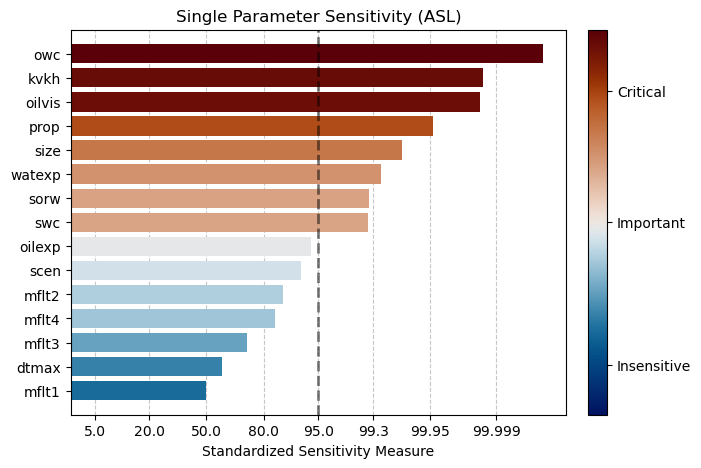

In [22]:
from visualization.single_pareto import single_pareto_standardized

single_pareto_standardized(
    single_sensitivity_results =  DGSA_results['single_ASL'], # results for single parameter sensitivity
    parameter_names = DGSA_results['parameter_names'], # model parameter names
    title = "Single Parameter Sensitivity (ASL)", # plot title
    fig_size = (7, 5), # figure size
    font_size = 10, # font size
    font = 'DejaVu Sans' # font family
)

### Pareto plot for sensitivity by cluster using the ASL method

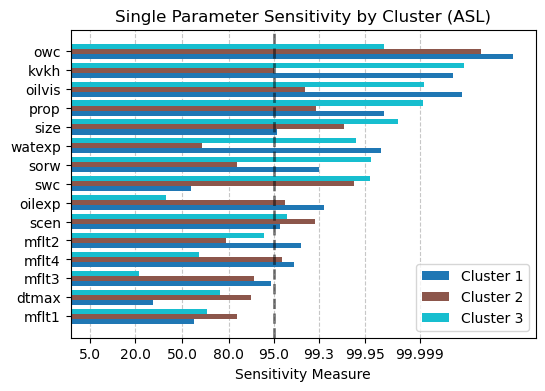

In [23]:
from visualization.single_pareto import single_pareto_by_cluster

single_pareto_by_cluster(
    single_sensitivity_results =  DGSA_results['single_ASL'], # results for single parameter sensitivity
    parameter_names = DGSA_results['parameter_names'], # model parameter names
    title = "Single Parameter Sensitivity by Cluster (ASL)", # plot title
    fig_size = (6, 4), # figure size
    font_size = 10, # font size
    font = 'DejaVu Sans' # font family
)

### Pareto plot for sensitivity with confidence interval

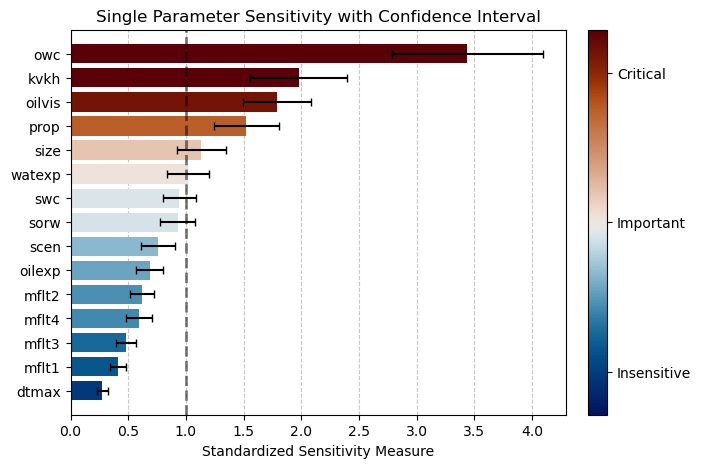

In [24]:
from visualization.single_pareto import single_pareto_ci

single_pareto_ci(
    standardized_low_alpha =DGSA_results['single_l1norm_standardized_3alphas'][:,1], # single parameter sensitivity results for low alpha
    standardized_medium_alpha = DGSA_results['single_l1norm_standardized_3alphas'][:,0], # single parameter sensitivity results for medium alpha
    standardized_high_alpha = DGSA_results['single_l1norm_standardized_3alphas'][:,2], # single parameter sensitivity results for high alpha
    parameter_names = DGSA_results['parameter_names'], # model parameter names
    title = "Single Parameter Sensitivity with Confidence Interval", # plot title
    fig_size = (7, 5), # figure size
    font_size = 10, # font size
    font = 'DejaVu Sans' # font family
)

# Visulization: Heatmaps

## Conidtional parameter sensitivity (two-way parameter interaction)

### Heatmap for standardized sensitivity using the l1norm method

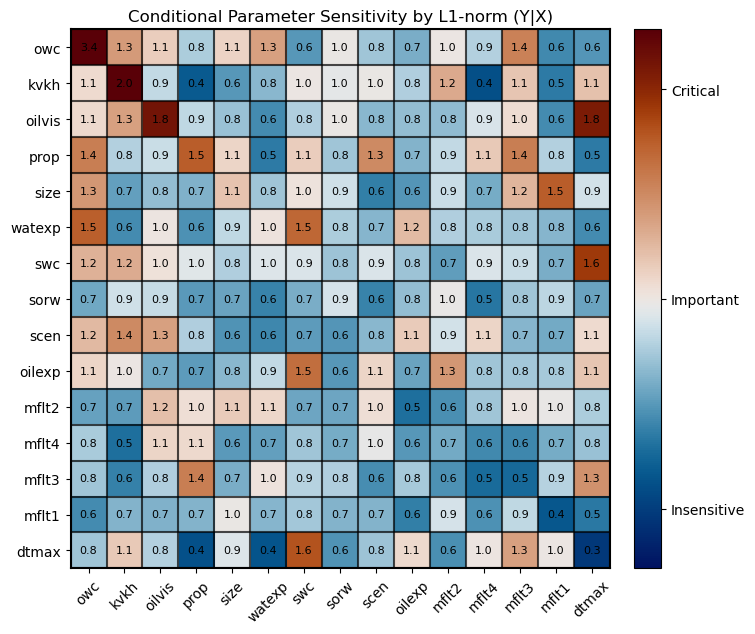

In [25]:
from visualization.conditional_heatmap import conditional_heatmap_standardized

conditional_heatmap_standardized(
    single_sensitivity_results =  DGSA_results['single_l1norm'], # results for single parameter sensitivity
    conditional_sensitivity_results = DGSA_results['conditional_l1norm'], # results for conditional parameter sensitivity
    parameter_names = DGSA_results['parameter_names'], # model parameter names
    title = "Conditional Parameter Sensitivity by L1-norm (Y|X)", # plot title
    fig_size = (8, 7), # figure size
    font = 'DejaVu Sans', # font family
    font_size = 10, # font size
    show_values = True  # whether to show sensitivity values in the heatmap
)

### Heatmap for standardized sensitivity using the ASL method

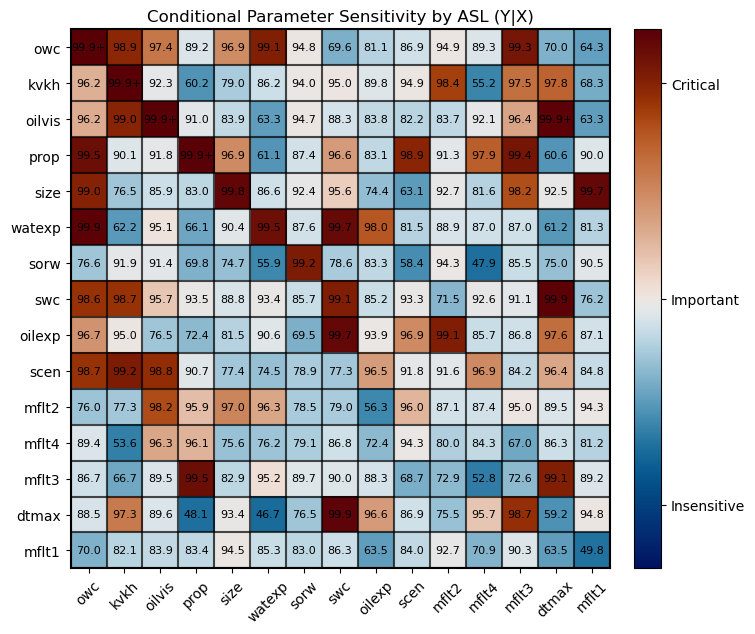

In [26]:
from visualization.conditional_heatmap import conditional_heatmap_standardized

conditional_heatmap_standardized(
    single_sensitivity_results =  DGSA_results['single_ASL'], # results for single parameter sensitivity
    conditional_sensitivity_results = DGSA_results['conditional_ASL'], # results for conditional parameter sensitivity
    parameter_names = DGSA_results['parameter_names'], # model parameter names
    title = "Conditional Parameter Sensitivity by ASL (Y|X)", # plot title
    fig_size = (8, 7), # figure size
    font = 'DejaVu Sans', # font family
    font_size = 10, # font size
    show_values = True  # whether to show sensitivity values in the heatmap
)

# Visualization: CDF plots

## CDF plots of single parameter sensitivity

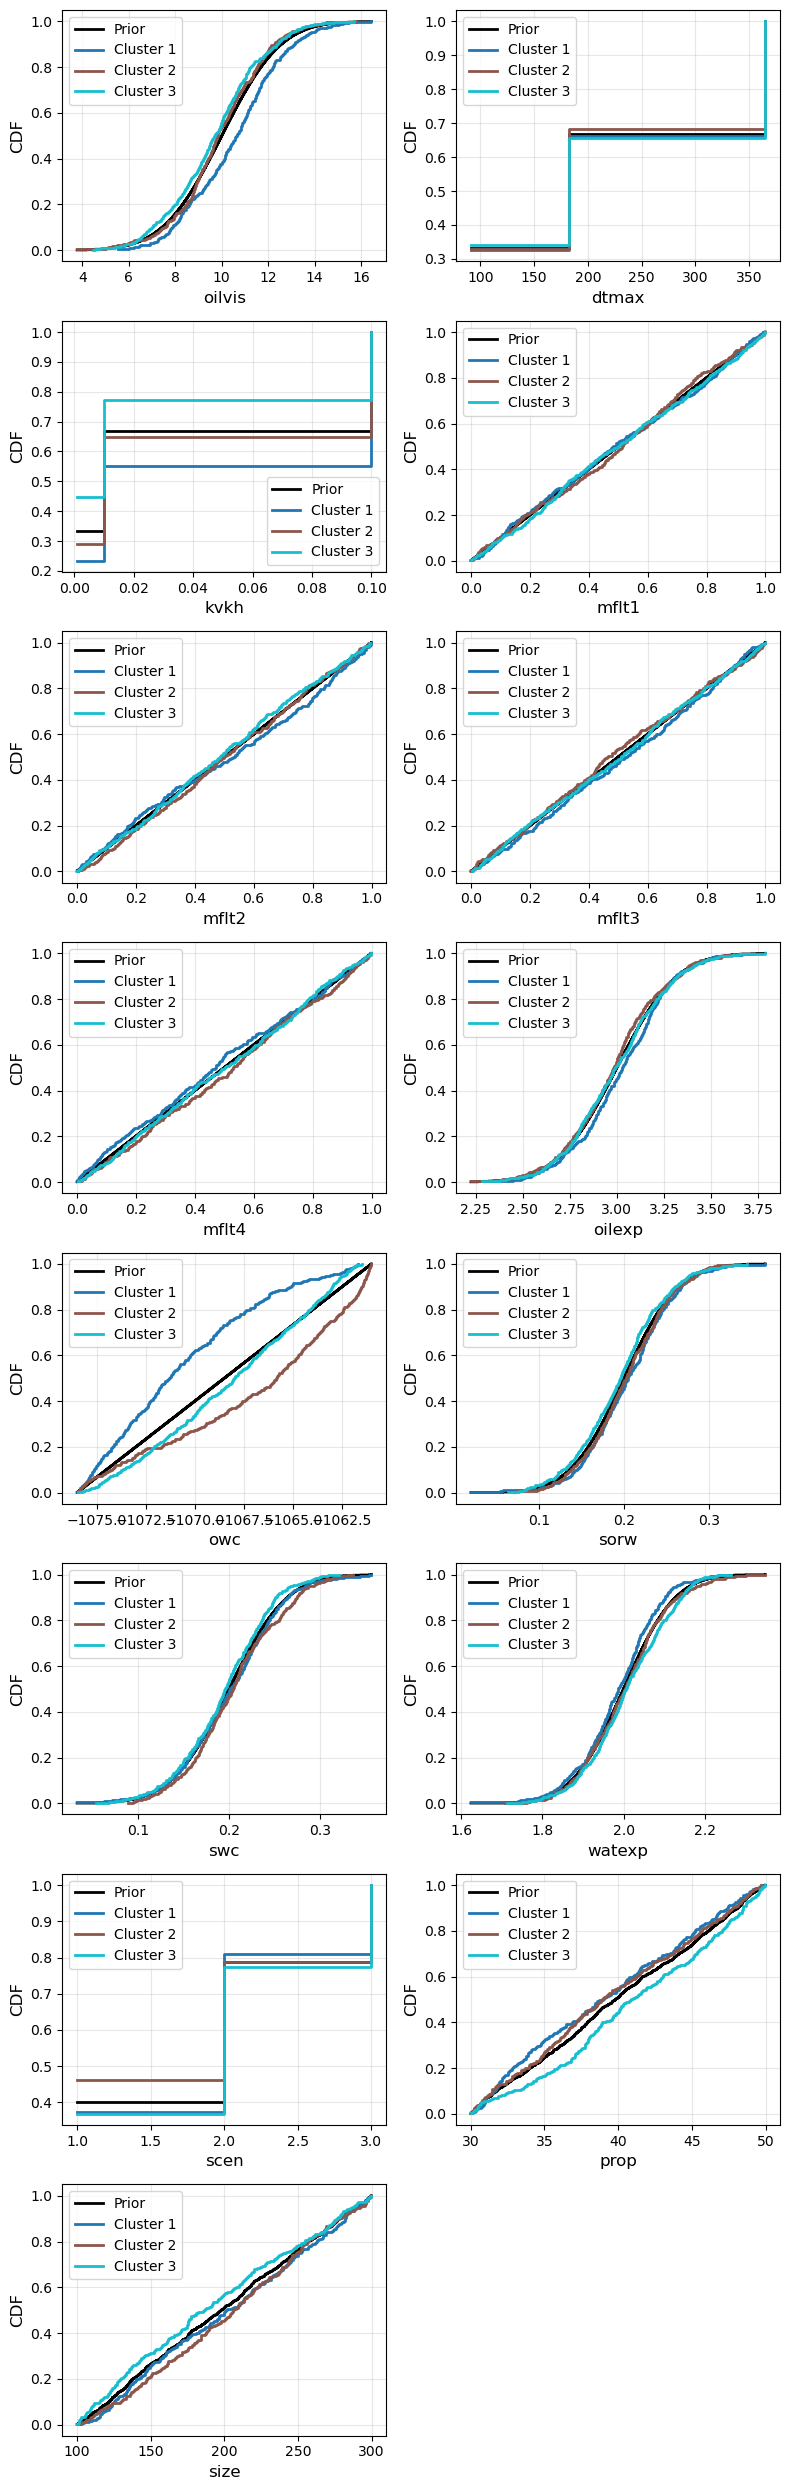

In [ ]:
from visualization.single_cdf import single_cdf
import pandas as pd

# Load parameter values
df_parameters = pd.read_csv(root_path / "data" / f"{case_name}_parameters.csv")
parameter_values = df_parameters.to_numpy()

single_cdf(
    parameter_values = parameter_values, # model parameter values
    clustering = DGSA_results['clustering'], # clustering results
    parameter_names = DGSA_results['parameter_names'], # model parameter names
    plot_parameter_list = DGSA_results['parameter_names'], # list of parameter names to plot
    fig_size = (8, 25), # figure size
    font_size = 12, # font size
    font = 'DejaVu Sans' # font family
)

## CDF plots of conditional parameter sensitivity

In [10]:
print(DGSA_results['parameter_names'])

['oilvis', 'dtmax', 'kvkh', 'mflt1', 'mflt2', 'mflt3', 'mflt4', 'oilexp', 'owc', 'sorw', 'swc', 'watexp', 'scen', 'prop', 'size']


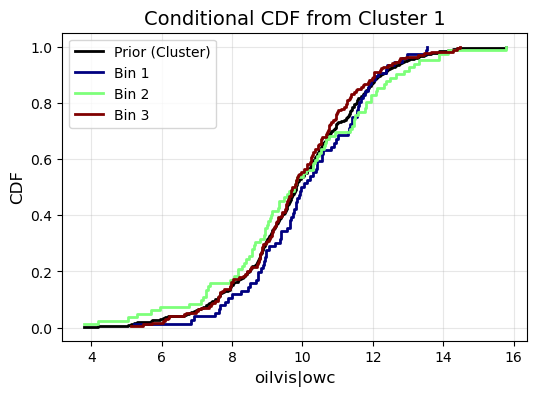

In [ ]:
from visualization.conditional_cdf import conditional_cdf
import pandas as pd

# Load parameter values
df_parameters = pd.read_csv(root_path / "data" / f"{case_name}_parameters.csv")
parameter_values = df_parameters.to_numpy()

conditional_cdf(
    parameter_names = DGSA_results['parameter_names'], # model parameter names
    parameter_values = parameter_values, # model parameter values
    clustering = DGSA_results['clustering'], # clustering results
    conditioned_parameter_name = 'oilvis', # name of the conditioned parameter, X of P(X|Y)
    conditioning_parameter_name = 'owc', # name of the conditioning parameter, Y of P(X|Y)
    n_bins = 3, # number of bins for the conditioning parameter
    which_cluster = 2, # cluster to visualize
    fig_size = (6, 4), # figure size
    font_size = 12, # font size
    font = 'DejaVu Sans' # font family
)

# Visualization: Multidimensional Scaling (MDS) of repsonse clusters

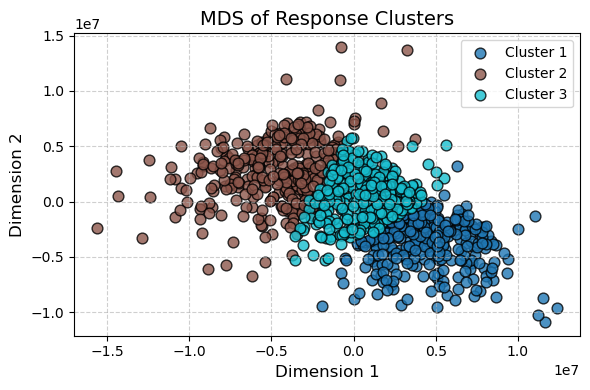

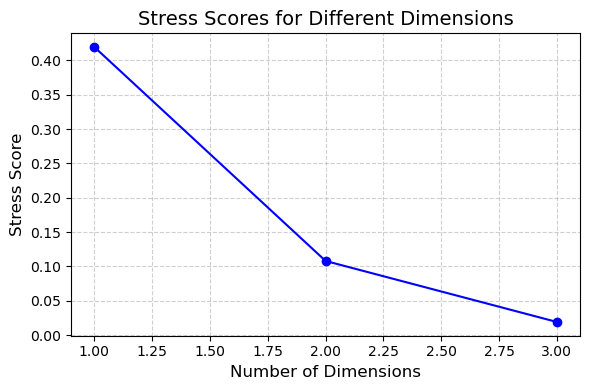

In [29]:
from visualization.cluster_MDS import cluster_MDS

cluster_MDS(
    distance_matrix = DGSA_results['distance_matrix'], # distance matrix used for clustering
    clustering = DGSA_results['clustering'], # clustering results
    stress_score_output_dimensions = 3, # stress score output dimensions
    fig_size = (6, 4), # figure size
    font_size = 12, # font size
    font = 'DejaVu Sans' # font family
)